<a href="https://colab.research.google.com/github/mertsaru/TensorFlow-NeuralNetwork-Example/blob/main/FeedForward_NN_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Network Example

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf

#Preparing Data

In [ ]:
df = load_breast_cancer()

In [ ]:
X , y = df.data, df.target

In [ ]:
#Normalizing data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Taking nearly equal number of data from each groups
sampler = RandomOverSampler()
X , y = sampler.fit_resample(X,y)

In [ ]:
# Dividing our data into training, test, and validation data.
# Training data = 0.6 Test data = 0.2 Validation data = 0.2
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size = 0.4)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp,y_temp,test_size = 0.5)

#Preparing the Model

In [ ]:
#Selecting the Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    ])

In [ ]:
#Building models parameters
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']
              )

#Running the Model

In [ ]:
#Learning
history = model.fit(X_train,y_train, epochs=20, batch_size=16, validation_data= (X_valid,y_valid))

Epoch 1/20
27/27 [==============================] - 1s 7ms/step - loss: 0.6416 - accuracy: 0.5491 - val_loss: 0.5474 - val_accuracy: 0.6643
Epoch 2/20
27/27 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.7827 - val_loss: 0.4261 - val_accuracy: 0.8182
Epoch 3/20
27/27 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.8668 - val_loss: 0.3259 - val_accuracy: 0.8951
Epoch 4/20
27/27 [==============================] - 0s 4ms/step - loss: 0.2850 - accuracy: 0.9136 - val_loss: 0.2567 - val_accuracy: 0.9021
Epoch 5/20
27/27 [==============================] - 0s 3ms/step - loss: 0.2291 - accuracy: 0.9299 - val_loss: 0.2083 - val_accuracy: 0.9231
Epoch 6/20
27/27 [==============================] - 0s 3ms/step - loss: 0.1890 - accuracy: 0.9416 - val_loss: 0.1714 - val_accuracy: 0.9720
Epoch 7/20
27/27 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9603 - val_loss: 0.1423 - val_accuracy: 0.9790
Epoch 8/20
27/27 [==

In [ ]:
#Getting Score of the Model
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9860


[0.05339120700955391, 0.9860140085220337]

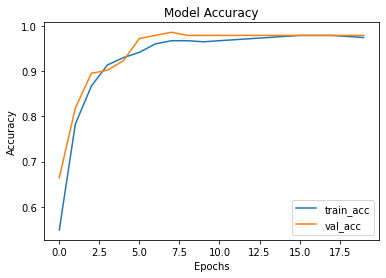

In [ ]:
plt.plot(history.history['accuracy'], label= 'train_acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

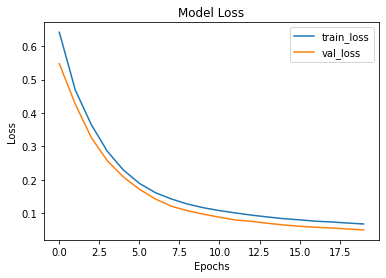

In [ ]:
plt.plot(history.history['loss'], label= 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()